<a href="https://colab.research.google.com/github/wylliamunlimited/polygon-awsflutter/blob/main/DQN_REINFORCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment

A tape of 10 steps. An agent can move left or right. At the end of the tape is a reward of 10.

In [ ]:
import gym
import numpy as np
import torch
# If GPU is available, use it; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class GridworldEnv(gym.Env):
    """
    A simple gridworld environment.

    The agent moves on a 1 dimensional tape and tries to find the treasure.

    Attributes:
        tape: A numpy array representing the tape.
        start_pos: The starting position of the agent.
        treasure_pos: The position of the treasure.

    Methods:
        reset(): Resets the environment to the starting state.
        step(action): Takes a step in the environment.
        render(): Renders the environment.
    """

    def __init__(self):
        # Define the grid
        self.tape = torch.tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 10], device=device, dtype=torch.float)

        # Define the start and treasure positions
        self.start_pos = 0
        self.treasure_pos = 9

        # Define the action space
        self.action_space = gym.spaces.Discrete(2)

        # Define the observation space
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(1, 10), dtype=np.float32)

        # Set the discount factor
        self.gamma = 0.9

    def reset(self):
        # Reset the agent's position to the start
        self.state = self.start_pos

        # Return the initial observation
        return [self.state]  # Add batch dimension

    def step(self, action):
        # Get the current state
        state = self.state

        # Move the agent based on the action
        if action == 0:  # Left
            next_state = (state - 1)
        elif action == 1:  # Right
            next_state = (state + 1)
        else:
            raise ValueError("Invalid action")

        # Check if the agent hit a wall
        if next_state < 0 or next_state >= self.tape.shape[0]:
            next_state = state

        # Check if the agent found the treasure
        if next_state == self.treasure_pos:
            reward = 10
            done = True
            self.reset()
        else:
            reward = 0
            done = False

        # Update the state
        self.state = next_state

        # Return the next observation, reward, and done flag
        return [self.state], reward, done, {}


    def render(self, mode="human"):
        # Print the grid
        ren = self.tape.clone().detach().tolist()
        ren[self.state] = 'A'
        print(ren)


# Create an instance of the environment
env = GridworldEnv()

# Reset the environment
state = env.reset()

timer = 0
# Play the game
while True:
    # Render the environment
    env.render()

    # Get the agent's action
    action = env.action_space.sample()

    # Take a step in the environment
    next_state, reward, done, _ = env.step(action)

    # Check if the game is over
    if done:
        print(f'time: {timer}')
        break

    # Update the state
    state = next_state
    timer += 1

# # Close the environment
# env.close()


['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0

# Action Space
There are just two possible actions: Left or Right, corresponding to the direction in which the agent can move.

# Reward
The reward is 0 for every step taken, except the termination step where its 10.

# Starting State
The start is always at position 0

# The Behavior of a Random Agent
We have checked here the average reward that a random agent can earn. A Random Agent selects actions randomly i.e without using any environment information. Running this snippet took 36 steps to get reward in my case. It may vary slightly in your case. But still, the problem is far from solved.

# What's Happening:
Consider the following interaction between Agent and Environment.

![Taken From Reinforcement Learning — An Introduction](https://miro.medium.com/v2/resize:fit:720/format:webp/1*hMsaWJZjlBrdSu-QzaRaDQ.png)

Based on the received observations and rewards from the environment, the agent selects some action. The agent must have some policy (aka strategy) according to which it selects an action. Just having a policy is not enough, the agent must have a mechanism to improve this strategy as it interacts more and more with the environment.

# DQN

Since we may not always know our environment completely, lets use a universal function approximator to approximate the policy our agent should take.

Let us see how we can use Deep Learning to address the above concerns :

1. Policy Network: Predicting Optimal Actions

In DL we use neural networks as function approximators. We can represent our policy via Deep NN. This NN will look at the given observation and will tell us which action is best to take in the current state. We refer to such Deep Neural Networks as Policy Network. Policy Network will analyze the current state of the grid (as its input) and recommend the most effective action (as its output). This network essentially captures the policy, or strategy, guiding the agent's navigation.

2. Evaluating Policy Effectiveness: Minimizing Loss

Now, how do we assess how well our Policy Network performs? Here, policy evaluation comes into play. We can utilize the Mean Squared Error (MSE) between the predicted returns (estimated value of future rewards) and the actual returns (obtained rewards from exploring the environment). Lower MSE signifies a closer alignment between predictions and reality, implying a better policy.

3. Refining the Policy: Gradient Descent Optimization

Armed with the MSE value, we can optimize the Policy Network. This is where Gradient Descent steps in. By iteratively adjusting the network's internal parameters based on the calculated gradients, we gradually minimize the MSE. As the loss diminishes, the Policy Network progressively learns to predict actions that lead to higher rewards, effectively refining the policy itself.

This iterative process of evaluating and optimizing the Policy Network enables it to constantly learn and improve, ultimately guiding the agent towards making intelligent decisions within the environment.

In [ ]:
import gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torch
import torch.nn as nn

class DQN(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, n_actions)  # Two-layer MLP

    def forward(self, x):
        x = F.relu(self.layer1(x))
        return self.layer2(x)  # Q-values for each action

# Hyperparameters (adjust as needed)
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
BATCH_SIZE = 128

# Function for selecting actions with ϵ-greedy exploration
def select_action(state, policy_net, steps_done):
    eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)
    sample = random.random()
    if sample > eps_threshold:
        with torch.no_grad():
            # Ensure state has batch dimension and correct shape
            state = state.unsqueeze(0)
            q_values = policy_net(state)
            action = q_values.argmax(dim=1)
            return action.item()
    else:
        return random.randrange(n_actions)


# Named tuple for storing transitions
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

# Replay memory to store and sample transitions
class ReplayMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Initialize the Gridworld environment
env = GridworldEnv()

# Get the number of actions and observations
n_actions = env.action_space.n
n_observations = env.observation_space.shape[0]

# Initialize Q-networks
policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

# Initialize optimizer and replay memory
optimizer = optim.AdamW(policy_net.parameters(), lr=1e-4, amsgrad=True)
memory = ReplayMemory(10000)

In the above code, we have created a experience replay memory which we will use for training our DQN. It stores the transitions that the agent observes, allowing us to reuse this data later. By sampling from it randomly, the transitions that build up a batch are decorrelated. It has been shown that this greatly stabilizes and improves the DQN training procedure.

For this, we’re going to need two classes:

1. **Transition** - a named tuple representing a single transition in our environment. It essentially maps (state, action) pairs to their (next_state, reward) result, with the state being the position of the agent on the tape.

2. **ReplayMemory** - a cyclic buffer of bounded size that holds the transitions observed recently. It also implements a .sample() method for selecting a random batch of transitions for training.



# Optimizing the model after each step

Here, you can find an optimize_model function that performs a single step of the optimization. It first samples a batch, concatenates all the tensors into a single one, computes $Q(s_t,a_t)$ and $V(s_{t+1}) = max_a Q(s_{t+1}, a)$ and combines them into our loss. By definition we set $V(s) = 0$​ if $s$ is a terminal state. We also use a target network to compute $V(s_{t+1})$ for added stability. The target network is updated at every step with a soft update controlled by the hyperparameter TAU, which was previously defined.

In [ ]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.tensor([[s for s in batch.next_state
                                                if s is not None]], device=device).t()
    state_batch = torch.tensor([batch.state], device=device).t()
    action_batch = torch.tensor([batch.action], device=device).t()
    reward_batch = torch.tensor([batch.reward], device=device).t()

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1).values
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(dim=1).values
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * env.gamma) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

Below is the main training loop. For each training episode, at the beginning, we reset the environment and obtain the initial state Tensor. Then, we sample an action, execute it, observe the next state and the reward (always 1), and optimize our model once. When the episode ends (or our model fails after 200 steps), we restart the loop.

Below, num_episodes is set to 200 if a GPU is available, otherwise 50 episodes are scheduled so training does not take too long. However, 50 episodes is insufficient for to observe good performance. You should see the model constantly achieve 500 steps within 600 training episodes. Training RL agents can be a noisy process, so restarting training can produce better results if convergence is not observed.

/home/arkokoley/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([128, 1, 128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Complete


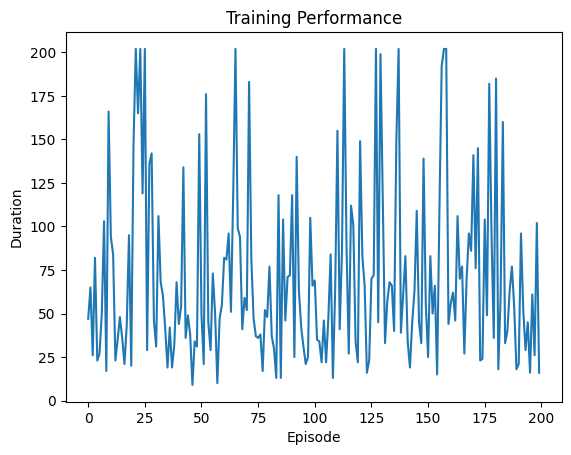

In [ ]:
# Training loop
num_episodes = 200
episode_durations = []

for i_episode in range(num_episodes):
    state = torch.tensor(env.reset(), device=device, dtype=torch.float)
    for t in count():
        action = select_action(state, policy_net, t)
        observation, reward, done, _ = env.step(action)
        reward = torch.tensor([reward], device=device)

        if not done:
            next_state = torch.tensor(observation, device=device, dtype=torch.float)
        else:
            next_state = None

        # Store the transition in memory
        memory.push(state, torch.tensor([action], device=device), next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*0.005 + target_net_state_dict[key]*(1-0.005)
        target_net.load_state_dict(target_net_state_dict)

        if done or t > 200:
            episode_durations.append(t + 1)
            break

print('Complete')
plt.plot(episode_durations)
plt.xlabel('Episode')
plt.ylabel('Duration')
plt.title('Training Performance')
plt.show()


Here is the diagram that illustrates the overall resulting data flow.

![From Pytorch Reinforcement Q Learning Tutorial](https://pytorch.org/tutorials/_images/reinforcement_learning_diagram.jpg)

Actions are chosen either randomly or based on a policy, getting the next step sample from the gym environment. We record the results in the replay memory and also run optimization step on every iteration. Optimization picks a random batch from the replay memory to do training of the new policy. The “older” target_net is also used in optimization to compute the expected Q values. A soft update of its weights are performed at every step.

# Play the game with our trained DQN policy_net

In [ ]:
state = torch.tensor(env.reset(), device=device, dtype=torch.float)
timer = 0
while True:
    # Render the environment
    env.render()

    # Get the agent's action
    action = select_action(state, policy_net, timer)
    # Take a step in the environment
    next_state, reward, done, _ = env.step(action)

    # Check if the game is over
    if done:
        print(f'time: {timer}')
        break

    # Update the state
    state = torch.tensor(next_state, device=device, dtype=torch.float)
    timer += 1


[-1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[-1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[-1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, -1, 0.0, 0.0, 0

Our Model now Reliably reaches the treasure in a finite number of steps. But it still performs terribly but more training should make it better.

# REINFORCE

Now, lets build another classic RL algorithm: REINFORCE.

The REINFORCE algorithm is a type of **policy gradient method** used in reinforcement learning (RL). It works by directly optimizing the policy of an agent, which is a function that maps states to actions. Unlike methods like DQN which estimate value functions, REINFORCE directly learns how to choose good actions based on their expected rewards.

Here's a breakdown of how REINFORCE works:

1. **Rollout:** The agent interacts with the environment by taking actions and observing the resulting states and rewards. This creates a sequence of transitions called a "rollout".
2. **Estimate Returns:** For each action taken in the rollout, the REINFORCE algorithm estimates the total discounted reward that the agent received by taking that action and continuing its policy. This is called the "return".
3. **Policy Gradient:** The algorithm uses the returns to calculate a gradient of the expected return with respect to the policy parameters. This tells the algorithm how to adjust the policy to increase the expected future reward.
4. **Policy Update:** The policy parameters are updated in the direction of the gradient, using an optimizer like Adam. This encourages the agent to take actions that have led to higher rewards in the past.

**Benefits of REINFORCE:**

* **Handles continuous action spaces:** Unlike DQN which requires discretization, REINFORCE works naturally with continuous actions.
* **No value function estimation:** It avoids the need to learn a separate value function, which can be computationally expensive.
* **Interpretability:** It allows for understanding how actions are chosen based on the learned policy.

**However, REINFORCE also has limitations:**

* **High variance:** Due to single-episode estimates, it can suffer from high variance and slow learning.
* **Instability:** It can be unstable in certain environments, especially with sparse rewards.

**Overall, REINFORCE is a good starting point for understanding policy gradient methods and can be suitable for simpler problems. For more complex tasks and improved performance, other policy gradient methods like PPO or SAC are often preferred.**

In [ ]:
import gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim

# Define the environment
env = GridworldEnv()  # Redefining the env.

# State and action space dimensions
n_observations = env.observation_space.shape[0]
n_actions = env.action_space.n

# Define the policy network as a two-layer MLP with a softmax output layer representing action probabilities.

class PolicyNet(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(n_observations, 128)
        self.fc2 = nn.Linear(128, n_actions)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

# Initialize policy network and optimizer
policy_net = PolicyNet(n_observations, n_actions).to(device)
optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)  # Tune learning rate


## The algorithm

This code implements the **REINFORCE algorithm** for training a policy in a reinforcement learning setting. Here's a breakdown of each section:

**Hyperparameters:**

* `GAMMA`: Discount factor (0.99) influences how much future rewards are valued compared to immediate ones.
* `BATCH_SIZE`: Number of transitions used for each policy update (32, but it's recommended to tune).
* `EPISODES`: Total number of training episodes (10).

**Episode Loop:**

* Resets environment, initializes episode variables.
* While not done:
    * Converts state to a tensor for the policy network.
    * Gets action probabilities from the policy network.
    * Samples an action based on these probabilities.
    * Takes action, observes reward and new state.
    * Stores transition (state, action, reward) in lists.
    * Updates episode reward.
    * Moves to the next state.

**Return Calculation:**

* Calculates discounted rewards for each transition (returns, considering future rewards discounted by `GAMMA`).
* Normalizes returns by subtracting the mean and dividing by the standard deviation.

**Policy Update:**

* Converts stored transitions to tensors.
* Calculates policy loss using discounted returns and action probabilities.
* Zeros the optimizer gradient.
* Performs backpropagation to calculate gradients with respect to policy parameters.
* Updates policy parameters using the optimizer.


Episode: 1, Reward: 10
Episode: 2, Reward: 10
Episode: 3, Reward: 10
Episode: 4, Reward: 10
Episode: 5, Reward: 10
Episode: 6, Reward: 10
Episode: 7, Reward: 10
Episode: 8, Reward: 10
Episode: 9, Reward: 10
Episode: 10, Reward: 10


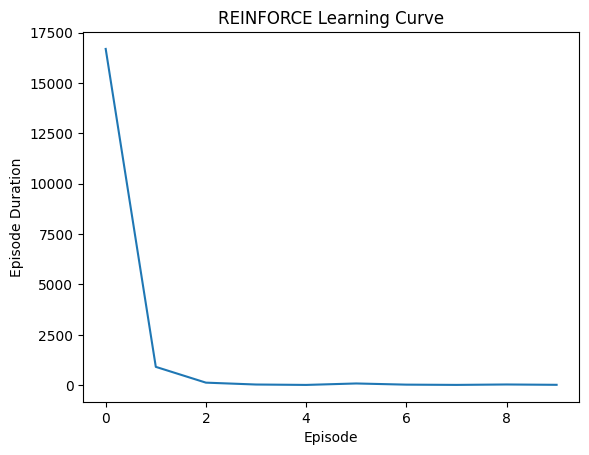

In [ ]:
# Hyperparameters
GAMMA = 0.9
BATCH_SIZE = 32  # Tune mini-batch size
EPISODES = 10

# Episode duration storage
episode_durations = []

for episode in range(EPISODES):
    # Reset environment and initialize episode
    state = env.reset()
    episode_reward = 0
    done = False
    states, actions, rewards = [], [], []

    while not done:
        # Convert state to tensor
        state_tensor = torch.tensor(state, device=device, dtype=torch.float).unsqueeze(0)

        # Get action probabilities from policy network
        action_probs = policy_net(state_tensor)

        # Sample action based on probabilities
        action = torch.multinomial(action_probs, 1).item()

        # Take action and observe reward
        new_state, reward, done, _ = env.step(action)

        # Store transition
        states.append(state)
        actions.append(action)
        rewards.append(reward)

        # Update episode reward
        episode_reward += reward

        # Move to the next state
        state = new_state

    # Compute discounted returns
    returns = []
    G = 0
    for reward in rewards[::-1]:
        G = reward + GAMMA * G
        returns.insert(0, G)

    # Normalize returns
    returns = torch.tensor(returns, dtype=torch.float).to(device)
    returns = (returns - returns.mean()) / (returns.std() + 1e-5)

    # Convert lists to tensors
    states = torch.tensor(states, device=device, dtype=torch.float)
    actions = torch.tensor(actions, device=device, dtype=torch.long)

    # Gradient calculation
    log_probs = torch.log(policy_net(states))
    action_log_probs = log_probs[range(len(actions)), actions]
    loss = -(returns * action_log_probs).mean()

    # Policy update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track episode duration
    episode_durations.append(len(states))

    print(f"Episode: {episode+1}, Reward: {episode_reward}")

# Plot learning curve
plt.plot(episode_durations)
plt.xlabel("Episode")
plt.ylabel("Episode Duration")
plt.title("REINFORCE Learning Curve")
plt.show()


# Play the game with the trained Network:

In [ ]:
state = env.reset()
timer = 0
while True:
    # Render the environment
    env.render()

    state_tensor = torch.tensor(state, device=device, dtype=torch.float).unsqueeze(0)

    # Get action probabilities from policy network
    action_probs = policy_net(state_tensor)

    # Sample action based on probabilities
    action = torch.multinomial(action_probs, 1).item()

    # Take action and observe reward
    new_state, reward, done, _ = env.step(action)

    # Check if the game is over
    if done:
        print(f'time: {timer}')
        break

    # Update the state
    state = new_state
    timer += 1


['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
['A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 'A', 0.0, 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'A', 0.0, 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'A', 0.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'A', 10.0]
time: 15
